## Linear Regression Performance Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Read in data

In [2]:
# Read in data 
df = pd.read_csv('week_10_linear_data.csv')
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


## Fit the linear model
Before we can measure performance we must fit the linear model

In [3]:
# Fit linear model using the formula
lm_fit = smf.ols(formula='y ~ x', data=df).fit()

In [4]:
# Check the fitted model estimates
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [5]:
# Preview the standard error
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [6]:
# Preview the cofficient p-values
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

In [7]:
# Preview coefficient confidence intervals and rename the columns
lm_fit.conf_int()

,0,1
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


In [8]:
# Rename the CI columns
lm_fit.conf_int().rename(columns={0:'ci_lower', 1:'ci_upper'})

,ci_lower,ci_upper
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


## Visualize the coefficient summaries using the coefficient plot 
Define a function for plotting the coefficient summaries for the linear model.

In [9]:
# Define a function for plotting model coefficient summaries
# Set editable figure size parameter
def coefplot(model, figsize_use=(10, 6) ):
    # Set figure and figure size
    fig, ax = plt.subplots(figsize = figsize_use)

    # Use errorbar to set the model y and x estimates and the x standard error
    ax.errorbar(y=model.params.index, 
               x=model.params,
               xerr = 2 * model.bse,
               fmt='o', ms=10, color='k', ecolor='k', elinewidth=2)
    
    # Include statistical significance reference line
    ax.axvline(x=0, linestyle='--', linewidth=2.5, color='grey')

    # Set x axis label
    ax.set_xlabel('coefficient value')

    # Show plot
    plt.show()

This function uses the approximation to the 95% confidence interval to visually show which inputs are statistically significant. This function can be used for any linear model no matter how many coefficients are estimated. 

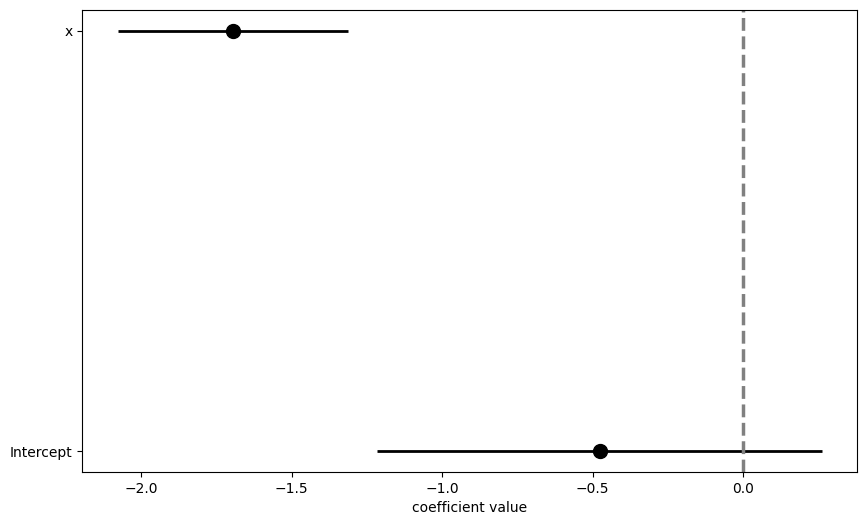

In [10]:
# Call the function and pass in the fitted model
coefplot(lm_fit)

## Measuring the fitted model performance with graphs
This involves measuring the model training data's performance or `Goodness of Fit`. We need this because the predictions we made on the training data above are stored with the fitted model object `lm_fit`. This is the data used to estimate the coefficients. The training set predictions for the fitted model can be retrieved using the attribute `.fittedvalues`. These training set predictions are commonly called the 'MODEL FITs' or the 'FITTED VALUES'.

In [11]:
# Retrieve the fitted values of the linear model training set
lm_fit.fittedvalues

0    4.612676
1    3.340376
2    2.068076
3    0.795777
4   -0.476523
5   -1.748823
6   -3.021123
7   -4.293422
8   -5.565722
dtype: float64

The fitted values gives us all of the predictions of the training set for the model. And we can use it to visually compare the training set predicted values with the observered output of the dataset.

In [12]:
# Make a copy of the data frame and select only the input and output columns
df_copy = df.loc[:, ['x', 'y']].copy()
df_copy

,x,y
0,-3.00,6.030315
1,-2.25,1.457911
2,-1.50,2.388383
3,-0.75,0.007815
4,0.00,0.651244
5,0.75,-2.254007
6,1.50,-2.969992
7,2.25,-3.537097
8,3.00,-6.063282


In [13]:
# Add a column for the predicted (fitted values) of the training data set
df_copy['fitted'] = lm_fit.fittedvalues # Predictions of the model on the training set
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


## Visualize the relationship between the input and the predicted output

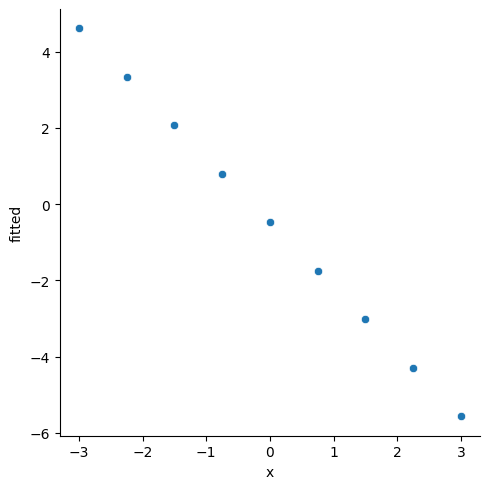

In [14]:
sns.relplot(x = 'x', y='fitted', data = df_copy)
plt.show()

The strainght dotted show that we have a relationship between the trend and the input values. To compare the observed output of the dataframe with the predicted output (model fits). We can overlay the observed output vs the input with the predicted trend (fitted values) with the input using seaborn scatterplot.

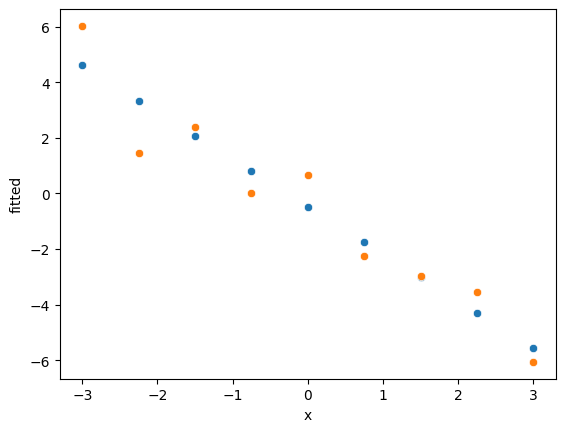

In [15]:
fig, ax = plt.subplots()

# fitted predictions output
sns.scatterplot(data = df_copy, x='x', y='fitted', ax=ax)

# observed output
sns.scatterplot(data= df_copy, x='x', y='y', ax=ax)

plt.show()

THe above plot will easily become meaningless with a large data set. Instead, it is advised to use a scatter plot that directly relates the observed output and the fitted output values using the `Predicted vs Observed` figure plot. Where the x-axis is the observed output `y`, and the y-axis is the `fitted` output values.

In [16]:
sns.set_style('whitegrid')

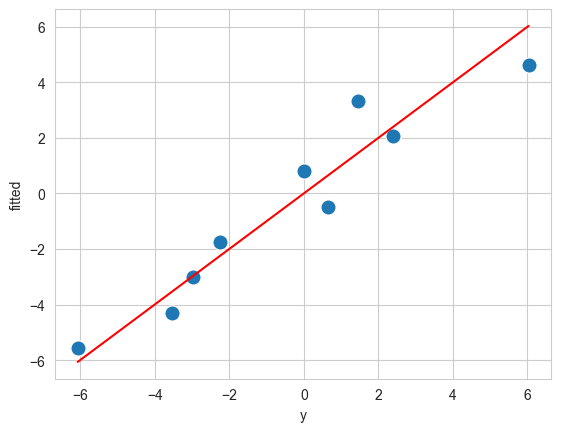

In [17]:
# Plot the relationship between observed vs fitted values with axis level plot
# Add a 45-degree reference line

fig, ax = plt.subplots()

# observed vs predited relationship
sns.scatterplot(data = df_copy, x='y', y='fitted', s=120, ax=ax)

# 45-degree reference line of the observed output
sns.lineplot(data = df_copy, x='y', y='y', color='red', ax=ax )

# show plot
plt.show()

Here we can see that when the observed output (red line) is 0 the fitted (predicted output) is 0. This means that if the predicted output is equal to 0 the fitted values will be located along the observed output line. So the closer the fitted values (blue dots) are to the red line, the better the model represents the training data. This means the smaller the error between the blue dot and the red line the better the model is. Not this is not measuring the input rather it is only measuring if the prediction is consistent with the output.

This means that the predicted vs observed metrics visualization can be created whether you have 1,2,3,4,....10,000 inputs. 

## Measuring quantitative metric for the correlation btw model prediction and observed output
This can be quantified by calculating the correlation coefficient between the model fits and the observed output. You can easily do this be selecting the observed output and the fitted output and apply the `.corr()` method. Let's see how to do this...

In [18]:
# Apply corr method to fitted and observed outputs
df_copy.loc[:, ['y', 'fitted']].corr(numeric_only=True) # Use numeric only to pull exact values only if you are not working with continous values

,y,fitted
y,1.000000,0.958347
fitted,0.958347,1.000000


In [19]:
# Retrieve the correlation coefficient btw the observed and fitted values for row 0 column 1 (the fitted value)
corr_eff = df_copy.loc[:,['y', 'fitted']].corr().iloc[0, 1]
corr_eff

0.9583473874664296

Note! the correlation coefficient can be either -vs of +ve. So let's square the correlation coefficient.

In [20]:
# calculate the r-square of the correlation coefficient of the fitted model
r_square = corr_eff ** 2

The R-square is a very important statistical value of the model because it tells you if the observed value increases with the predicted value of the model. It can also be automatically calculated using the `.rsquared` attribute.

In [21]:
# Calculate the R-squres of the fitted model
lm_fit.rsquared

0.918429715063731

Why does this matter? This is an important predicitoon metric:

If there is `a general linear relationship` showing that the observed output is generally increasing as the predicted value is increasing - The R-Square will be `high`

If there is a `lack of a general linear relationship` between the observed output and the predicted output - The R-Square will be `low`

Ideally, a good R-Square is equal to 1. A bad R-Square is equal to 0 not good. Although you can have a negative R-Square.

Overall the better your predicted model is linearly related to the observed the better the R-Square will be vice versa. 

## Measuring Errors (Residuals)
Errors are meant to represent unexplained variability. It is everything that the model cannot capture. It is the difference between the observed output and the predicted trend or fitted values. Let's make a column for these differences and visualize them.

In [22]:
# Calculate the error and assign to a new column
df_copy['errors'] = df_copy.y - df_copy.fitted
df_copy

,x,y,fitted,errors
0,-3.00,6.030315,4.612676,1.417639
1,-2.25,1.457911,3.340376,-1.882465
2,-1.50,2.388383,2.068076,0.320307
3,-0.75,0.007815,0.795777,-0.787961
4,0.00,0.651244,-0.476523,1.127767
5,0.75,-2.254007,-1.748823,-0.505184
6,1.50,-2.969992,-3.021123,0.051131
7,2.25,-3.537097,-4.293422,0.756326
8,3.00,-6.063282,-5.565722,-0.497560


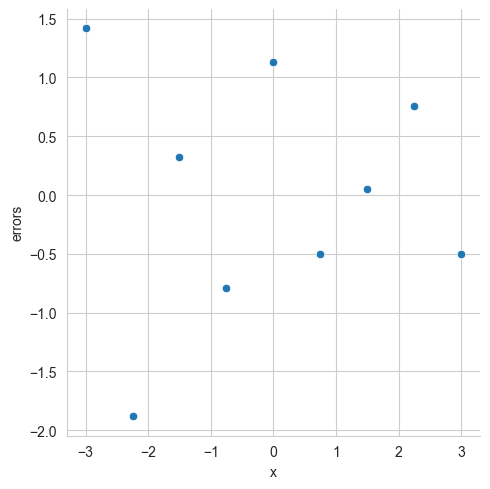

In [23]:
# Visualise the error given the input
sns.relplot(data=df_copy, x='x', y='errors')
plt.show()

If the error plot was a very clear trend whether it is negative or positive or some other non linear trend, that will tell you that there is some feature that you should derive from your input to better capture the output-to-input relationship. Also the distribution of the error should be gassian in shape. If we had enough data I would plot the histogram to show the error distribution.

You can also use statsmodels object `.resid` attribute to compute the errors or residuals of the fitted model

In [24]:
# compute error (residuals) using statsmodels
lm_fit.resid

0    1.417639
1   -1.882465
2    0.320307
3   -0.787961
4    1.127767
5   -0.505184
6    0.051131
7    0.756326
8   -0.497560
dtype: float64

In [25]:
# assign residuals to a new column and compare
df_copy['residuals'] = lm_fit.resid
df_copy

,x,y,fitted,errors,residuals
0,-3.00,6.030315,4.612676,1.417639,1.417639
1,-2.25,1.457911,3.340376,-1.882465,-1.882465
2,-1.50,2.388383,2.068076,0.320307,0.320307
3,-0.75,0.007815,0.795777,-0.787961,-0.787961
4,0.00,0.651244,-0.476523,1.127767,1.127767
5,0.75,-2.254007,-1.748823,-0.505184,-0.505184
6,1.50,-2.969992,-3.021123,0.051131,0.051131
7,2.25,-3.537097,-4.293422,0.756326,0.756326
8,3.00,-6.063282,-5.565722,-0.497560,-0.497560


You can see that the error column we calculated is the same as using the `.resid` attribute. The errors can be calculated for every data point hence it is nice to summarize the errors across all the data points by squaring the errors. 

In [26]:
# Square the error values accross the model
lm_fit.resid ** 2

0    2.009701
1    3.543673
2    0.102596
3    0.620883
4    1.271859
5    0.255211
6    0.002614
7    0.572029
8    0.247566
dtype: float64

In [27]:
# Summarize squared errors
(lm_fit.resid **2).sum()

8.626133173634287

Why should we do this? 

Because some of the errors in the model will more likely contain negative values. It is important to summarize (square) them so there are only positive squared value. 

- The smaller (closer) the squared error is to 0, the closer is the prediction or model fit is to the observed output.
- The larger (further) the squared error is to 0, the worse the prediction is from the observed output.

Because we have so many squared error data points hence we summarize the squared errors. That is summing the squared error. Which is also known as `**SSE**`.
But the SSE increases as the number of data point increases... For this reason, we average the squared errors. This is known as **MEANS SQUARED ERROR**`**MSE**`. You can do this by taking the error and apply the `mean()` method.

In [28]:
# avg the squared errors
(lm_fit.resid **2).mean()

0.9584592415149208

The MSE has one draw back, its output is in units squared. So fro example if you are predicting the sale of a caar the MSE will be in squared dollars. So we apply the SQUARE ROOT to the MSE to produce an error metric in the same units as the output.

The square root of the MSE is known as the `**RMSE**` ROOT MEAN SQUARE ERROR of our regression model.

In [29]:
# Apply sqrt to the MSE
mse = (lm_fit.resid **2).mean()
np.sqrt(mse)

0.9790093163575722

## Absolute Error Metric
Another kind of error metric is based on absolute error measurement

In [30]:
# calculate the absolute value of the error 
np.abs(lm_fit.resid)

0    1.417639
1    1.882465
2    0.320307
3    0.787961
4    1.127767
5    0.505184
6    0.051131
7    0.756326
8    0.497560
dtype: float64

The smaller the error is closest to 0 the smaller is the relative output. The average of the absolute error give use the MEAN ABSOLUTE ERROR - `**MAE**`.  This is the average absolute error of the training data. 

In [31]:
# Calculate the MAE - 
(np.abs(lm_fit.resid)).mean()

0.8162599885208113

The MAE is less sensitive to extreme output values because it is not sqaring the output error. If you have extreem output error (high values) you may want to focus on the MAE insead of MSE.

## Summary 

We have explored two types of performance metrics for regression problems.

First, we examined the general linear relationship between predicted and observed values, quantified by R-squared.

Second, we looked at error metrics that summarize a model's errors. These can be based on squared errors, summarized as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), or on absolute errors, summarized as Mean Absolute Error (MAE).